<a href="https://colab.research.google.com/github/75092851/curso-R-Python-data-science-analisis-datos/blob/main/ML_BIOLOGIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

vector = np.array([1, 2, 3, 4, 5])
vector

array([1, 2, 3, 4, 5])

In [ ]:
vector*2

array([ 2,  4,  6,  8, 10])

In [ ]:
otro_vector = np.array([10, 20, 30, 40, 50])
vector + otro_vector

array([11, 22, 33, 44, 55])

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LuisPerezTimana/Webinars/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df = df.loc[:, ["Glucose", "BMI", "Outcome"]]
df

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
...,...,...,...
763,101,32.9,0
764,122,36.8,0
765,121,26.2,0
766,126,30.1,1


In [ ]:
df.Glucose

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [ ]:
df_filtrado = df[df.BMI > 50]
df_filtrado

,Glucose,BMI,Outcome
120,162,53.2,1
125,88,55.0,1
177,129,67.1,1
193,135,52.3,1
247,165,52.3,0
303,115,52.9,1
445,180,59.4,1
673,123,57.3,0


In [ ]:
df.describe()

,Glucose,BMI,Outcome
count,768.000000,768.000000,768.000000
mean,120.894531,31.992578,0.348958
std,31.972618,7.884160,0.476951
min,0.000000,0.000000,0.000000
25%,99.000000,27.300000,0.000000
50%,117.000000,32.000000,0.000000
75%,140.250000,36.600000,1.000000
max,199.000000,67.100000,1.000000


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

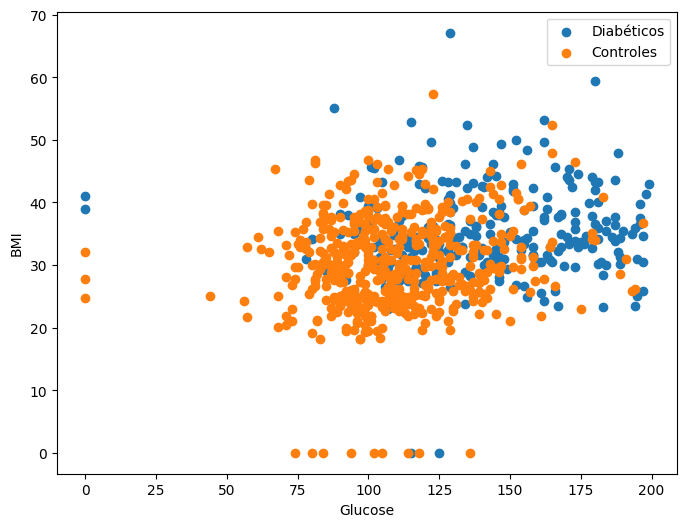

In [ ]:
D = df[df.Outcome == 1]
C = df[df.Outcome == 0]

plt.figure(figsize = (8, 6))

plt.scatter(D.Glucose, D.BMI, label = "Diabéticos")
plt.scatter(C.Glucose, C.BMI, label = "Controles")

plt.legend()
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

In [ ]:
# SEPARAR LA INFORMACIÓN EN X E Y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(x)
print(y)

     Glucose   BMI
0        148  33.6
1         85  26.6
2        183  23.3
3         89  28.1
4        137  43.1
..       ...   ...
763      101  32.9
764      122  36.8
765      121  26.2
766      126  30.1
767       93  30.4

[768 rows x 2 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_stand = scaler.fit_transform(x)
x_stand

array([[ 0.84832379,  0.20401277],
       [-1.12339636, -0.68442195],
       [ 1.94372388, -1.10325546],
       ...,
       [ 0.00330087, -0.73518964],
       [ 0.1597866 , -0.24020459],
       [-0.8730192 , -0.20212881]])

In [ ]:
# División de datos en conjuntos de entrenamiento y testeo

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_stand, y, test_size = 0.2, random_state = 1)

print(x_train.shape)
print(x_test.shape)

(614, 2)
(154, 2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf

RandomForestClassifier()

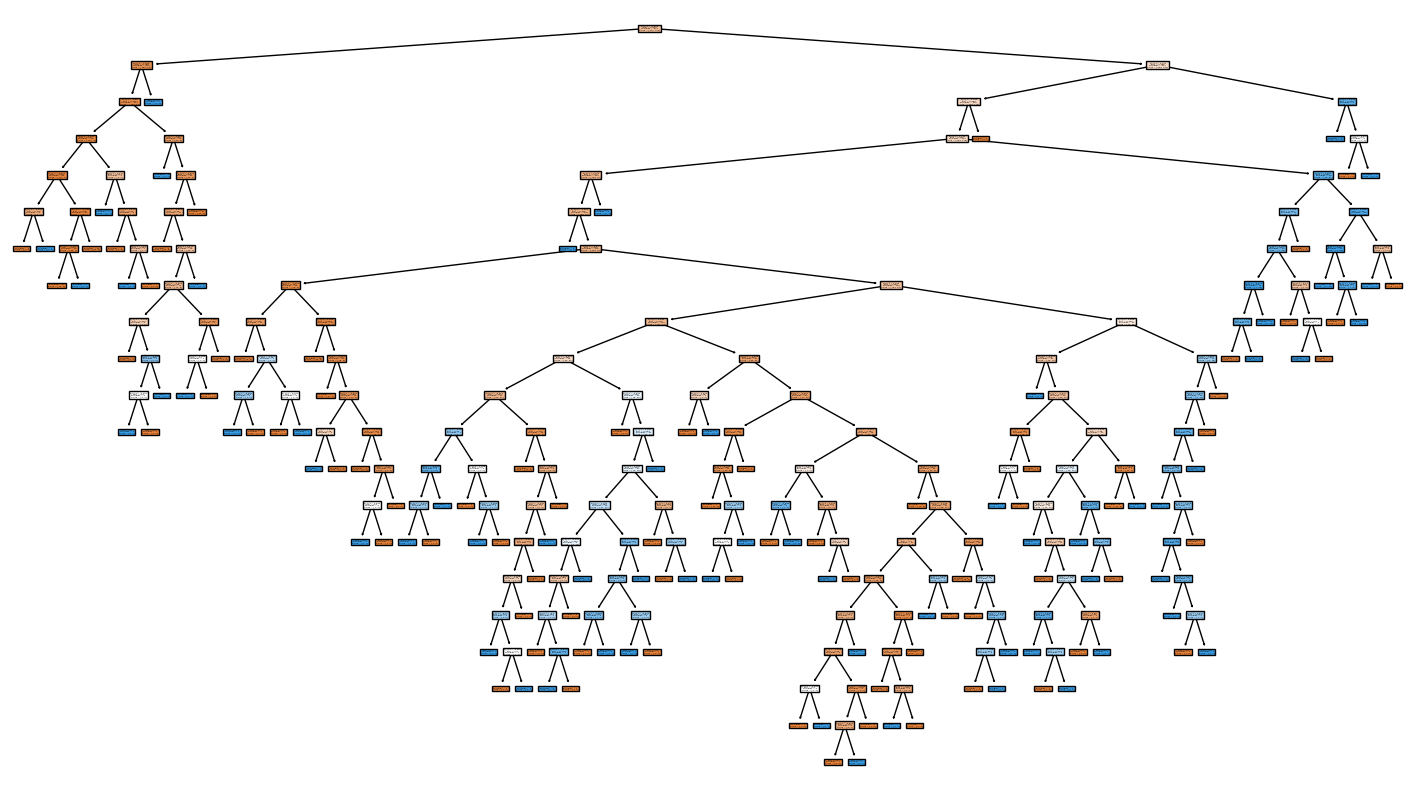

In [ ]:
from sklearn import tree

plt.figure(figsize = (18, 10))

tree.plot_tree(rf.estimators_[0], filled = True)

plt.show()

In [ ]:
y_pred = rf.predict(x_test)
y_pred


rf.predict_proba(x_test)[:, 1]

array([0.175     , 0.42      , 0.02      , 0.32      , 0.37      ,
       0.03      , 0.65      , 0.01      , 0.29      , 0.44      ,
       0.45333333, 0.        , 0.48      , 0.87      , 0.66      ,
       0.6635    , 0.55      , 0.39      , 0.        , 0.19      ,
       0.48      , 0.05      , 0.6       , 0.25      , 0.095     ,
       0.35      , 0.37      , 0.676     , 0.09916667, 0.22      ,
       0.09      , 0.21      , 0.        , 0.95      , 0.35      ,
       0.44      , 0.01      , 0.27      , 0.03      , 0.7       ,
       0.16      , 0.35      , 0.03      , 0.52833333, 0.01      ,
       0.        , 0.79      , 0.8       , 0.        , 0.1       ,
       0.        , 0.1775    , 0.53333333, 0.        , 0.68      ,
       0.01      , 0.49666667, 0.03      , 0.21866667, 0.        ,
       0.91      , 0.05      , 0.81      , 0.12      , 0.71      ,
       0.42      , 0.01      , 0.06      , 0.68      , 0.77      ,
       0.97      , 0.44      , 0.09      , 0.        , 0.115  

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7597402597402597

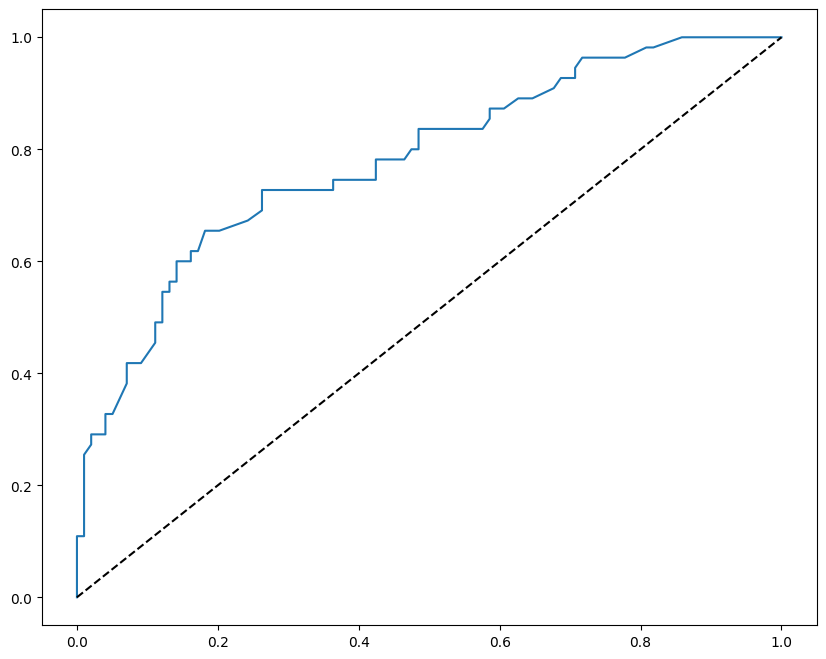

In [ ]:
y_pred_prob = rf.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize = (10, 8))

plt.plot(fpr, tpr, label = "Random Forest - AUC = " + str(roc_auc))
plt.plot([0, 1], [0, 1], "k--")

plt.show()

In [ ]:
import seaborn as sns

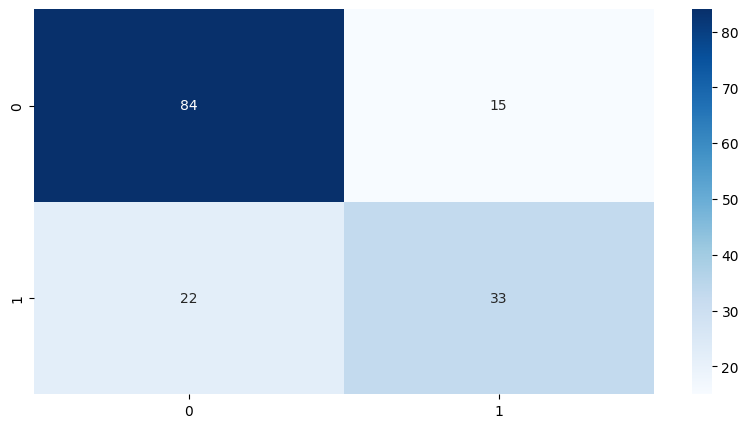

In [ ]:
matriz =  confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 5))
sns.heatmap(matriz, annot = True, cmap = "Blues")

plt.show()

In [ ]:
x_min, x_max = x.Glucose.min() -1, x.Glucose.max() + 1
y_min, y_max = x.BMI.min() -1, x.BMI.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

matriz = scaler.fit_transform(np.c_[xx.ravel(), yy.ravel()])
matriz

Z = rf.predict(matriz)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

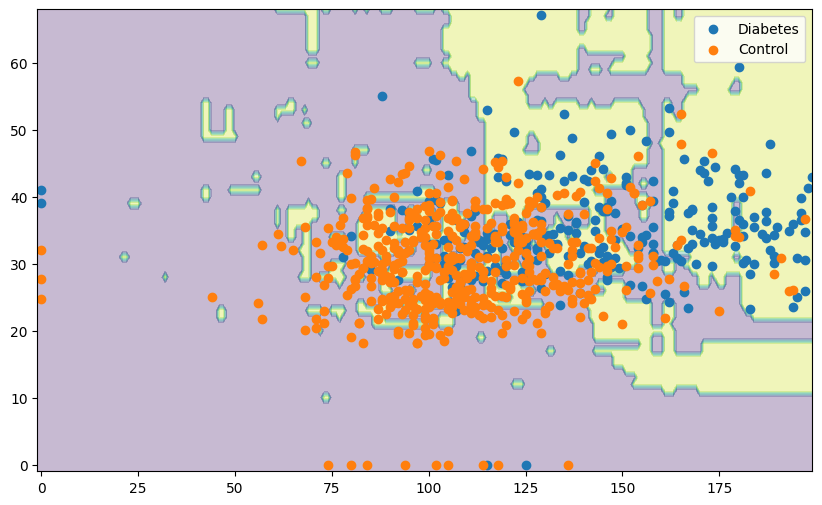

In [ ]:
plt.figure(figsize = (10, 6))

plt.contourf(xx, yy, Z, alpha = 0.3, cmap = "viridis")
plt.scatter(D.Glucose, D.BMI, label = "Diabetes")
plt.scatter(C.Glucose, C.BMI, label = "Control")
plt.legend()
plt.show()